In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [8]:
def scores(y_test,prediction):
#     print("Accuracy: " + str(accuracy_score(y_test, prediction) * 100) + "%")
#     print("Precision: " + str(precision_score(y_test, prediction) * 100) + "%")
#     print("F1 score: " + str(f1_score(y_test, prediction) * 100) + "%")
#     print("Recall: " + str(recall_score(y_test, prediction) * 100) + "%")
    scores = []
    scores.append(accuracy_score(y_test, prediction) * 100)
    scores.append(precision_score(y_test, prediction) * 100)
    scores.append(f1_score(y_test, prediction) * 100)
    scores.append(recall_score(y_test, prediction) * 100) 
   # print('Accuracy:',accuracy_score(y_test, prediction) * 100,'%')
   # print(confusion_matrix(y_test,prediction))
   # print(classification_report(y_test, prediction, target_names=["red wine","white wine"]))
    return scores

In [9]:
def cross_validation(dados,clf,folds=10):
    scor = []
    kf = KFold(n_splits=folds)
    for train_index, test_index in kf.split(dados):
        X_train, X_test = dados.iloc[train_index], dados.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        model = clf.fit(X_train,y_train)
        prediction = model.predict(X_test)
        scor.append(scores(y_test,prediction))
    return scor

In [4]:
#carregando dataset de vinhos brancos e vermelhos
wines = pd.read_csv('wines.csv',sep=",")
#separando dados e saidas
X = wines.iloc[:,0:12]
Y = wines.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [11]:
# Classifier 1
clf1 = GaussianNB(priors=[0,1])
# Classifier 2
clf2 = GaussianNB(priors=[0.25,0.75])
# Classifier 3
clf3 = GaussianNB(priors=[0.5,0.5])
# Classifier 4
clf4 = GaussianNB(priors=[0.75,0.25])
# Classifier 5
clf5 = GaussianNB(priors=[1,0])

In [6]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(X)

# Show feature
winesS = X.copy()
winesS.iloc[0:,0:12] = standardized

C:\Users\Paulo Alencar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paulo Alencar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
scors1 = cross_validation(winesS,clf1)
scors2 = cross_validation(winesS,clf2)
scors3 = cross_validation(winesS,clf3)
scors4 = cross_validation(winesS,clf4)
scors5 = cross_validation(winesS,clf5)


C:\Users\Paulo Alencar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:435: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\Paulo Alencar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:435: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\Paulo Alencar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:435: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\Paulo Alencar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:435: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\Paulo Alencar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:435: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
C:\Users\Paulo Alencar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:435: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.cla

In [39]:
scors5

[[24.615384615384617, 0.0, 0.0, 0.0],
 [23.692307692307693, 0.0, 0.0, 0.0],
 [26.0, 0.0, 0.0, 0.0],
 [26.769230769230766, 0.0, 0.0, 0.0],
 [24.153846153846153, 0.0, 0.0, 0.0],
 [24.153846153846153, 0.0, 0.0, 0.0],
 [24.461538461538463, 0.0, 0.0, 0.0],
 [25.115562403698, 0.0, 0.0, 0.0],
 [22.95839753466872, 0.0, 0.0, 0.0],
 [24.19106317411402, 0.0, 0.0, 0.0]]

In [42]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

def plot_graph(scor):
    measures = ["accuracy","precision","f1-score","recall"]
    data = {s:{'Run '+str(i):scor[i][k] for i in range(10)}for k,s in enumerate(measures)}
    df = pd.DataFrame(data)

    df.plot(kind='barh',figsize=(20,20))

    for i in range(0,27):
        plt.axvline(x=i, color='k', linestyle='--')

    plt.xlim(0,27)
    plt.title('Naive Bayes x prior = 1 , 0')
    plt.savefig('images_graphs/NB5.png')
    plt.show()

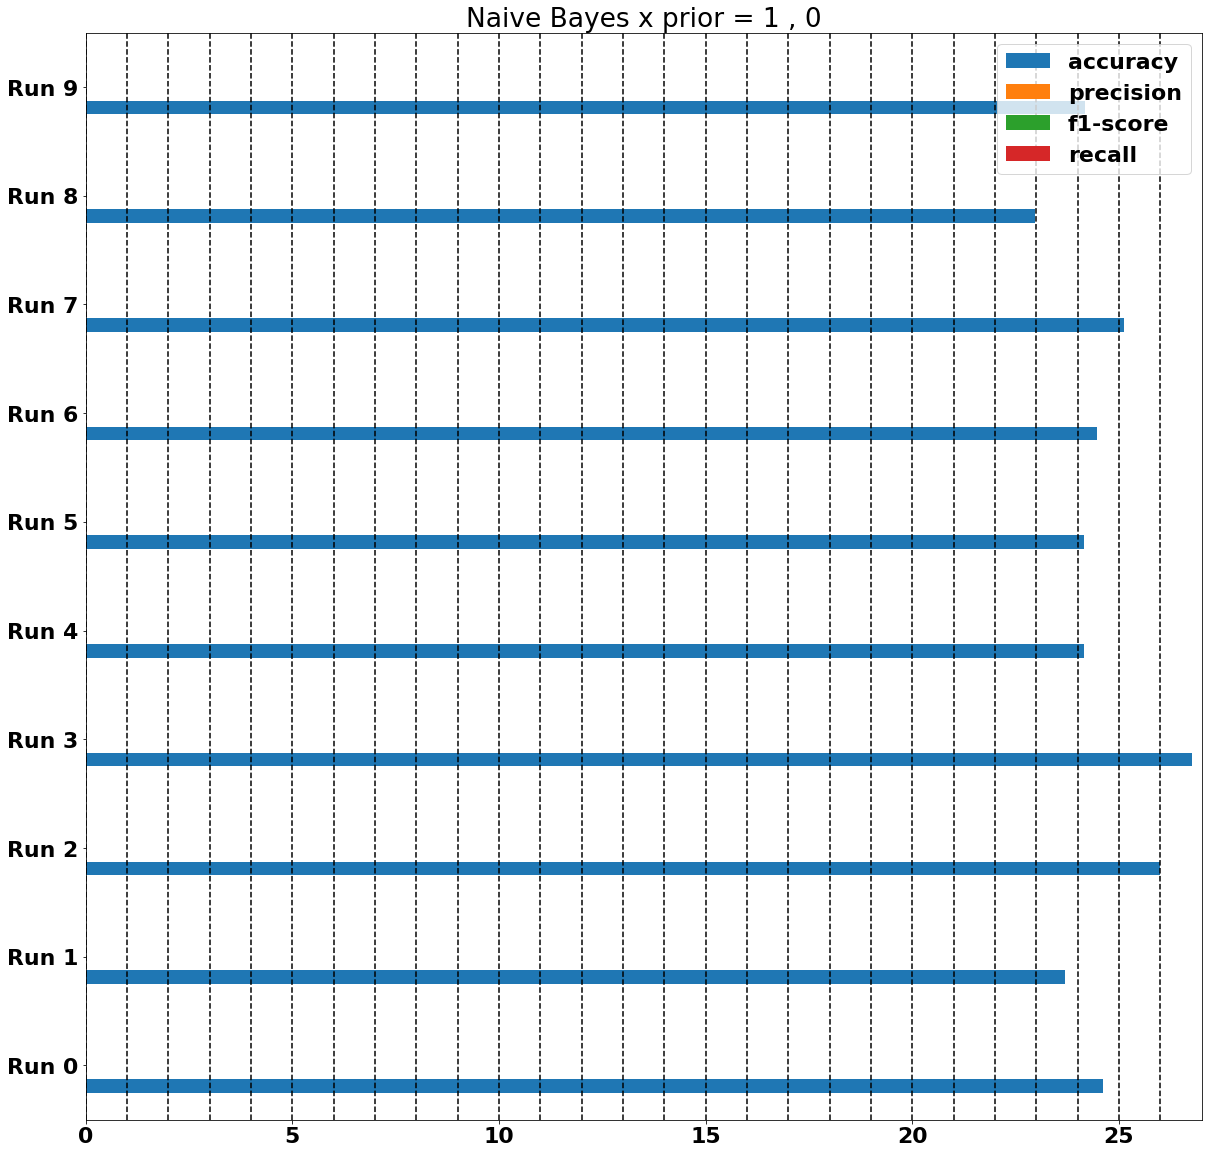

In [43]:
plot_graph(scors5)